# Dataset: Frijoles

Para el desarrollo del proyecto orientado a Big Data, es necesario aplicar la metodología CRISP-DM con el objetivo de seguir una serie de tareas organizadas y estructuradas que están clasificadas en seis fases. Además de permitir la comprensión adecuada del problema abordado hasta empezar el funcionamiento de los modelos de aprendizaje automático más óptimos. 

## Fase 1: Comprensión del negocio.

Nota: el siguiente caso presentado en este proyecto será de carácter académico e hipotético con el fin de profundizar y estudiar la analítica de Big Data. 

### 1.1.Empresa Maritza:

"Maritza" es una empresa que se encarga de producir y cosechar una gran variedad de granos nacionales para el consumo de las familias colombianas. Por lo tanto, entre los granos se encuentran los frijoles, los cuales disponen de diferentes tipos: Frijol Bola Roja, Frijol Nima, Frijol Cargamento y Frijol Radical. 

Por otro lado, la empresa colombiana conserva la visión de cosechar los mejores productos considerando la nutrición, frescura y naturaleza de los granos. Debido a esto, Maritza se preocupa que las familias colombianas reciban lo mejor para su consumo alimenticio. 

Página oficial de la empresa: https://www.mundomaritza.com/.

### 1.2.Problema presentado:

A raíz de que la empresa presenta un fuerte crecimiento en la producción de sus productos, no cuenta con el personal calificado para separar adecuadamente cada grupo de frijoles en un tiempo óptimo con tal de cumplir con la demanda solicitada por el mercado colombiano. Por lo tanto, deciden implementar un proceso automatizado mediante la integración de tecnología avanzada y un sistema de datos. Como resultado, desean contratar a un grupo de ingenieros de datos, donde analicen cada tipo de frijol contemplando sus características más importantes definidas por la empresa: frescura, nutrición, naturaleza, entre otros. 

Objetivo: desarrollar un modelo de aprendizaje automático que permita mediante el análisis de un conjunto de datos suministrados por la empresa, clasificar correctamente cada tipo de frijol considerando una lista de características fundamentales establecidas por el cliente. De este modo, estos algoritmos entrenados serán integrados al sistema con la finalidad de mejorar el rendimiento y distribución de los frijoles. 

## Fase 2: Comprensión de los datos.

### 2.1.Contexto del dataset:

Para esta fase, se trabajó con un conjunto de datos recolectados por la empresa previamente, las cuales cuentan con información suficiente para realizar el proceso de exploración de las características de cada frijol. 

A continuación, se expone la siguiente información resumida del dataset:

- Se utilizaron siete tipos diferentes de frijoles secos, teniendo en cuenta las características como forma, tipo y estructura según la situación del mercado.

- Sistema de visión por computadora para distinguir siete variedades diferentes registradas de frijol seco.

- Contiene datos de imágenes del alta resolución de 13.611 granos de 7 frijoles diferentes registrados.

- Se contemplan un total de 17 características obtenidas para cada frijol seco.

Por otro lado, los atributos o características registradas en el dataset tienen la siguiente descripción: 

- Area (A): El área de una zona de frijol y el número de píxeles dentro de sus límites.

- Perimeter (A): La circunferencia del frijol se define como la longitud de su borde.

- Major axis length (L): La distancia entre los extremos de la línea más larga que se puede dibujar de un frijol.

- Minor axis length (l): La línea más larga que se puede dibujar desde el frijol mientras se encuentra perpendicular al eje principal. 

- Aspect ratio (K):  Define la relación entre L y l.

- Eccentricity (Ec): Excentricidad de la elipse que tiene los mismos momentos que la región.

- Convex area (C): Número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol. 

- Equivalent diameter (Ed): El diámetro de un círculo que tiene la misma área que el área de una semilla de frijol.

- Extent (Ex): La relación de los píxeles en el cuadro delimitador al área del frijol. 

- Solidity (S): También conocida como convexidad. La relación entre los píxeles de la capa convexa y los que se encuentran en los frijoles.

- Roundness (R): Calculado con la siguiente fórmula: (4piA)/(P^2).

- Compactness (CO): Mide la redondez de un objeto: Ed/L.

- ShapeFactor1 (SF1)

- ShapeFactor2 (SF2)

- ShapeFactor3 (SF3)

- ShapeFactor4 (SF4)

- Class: Tipos de frijoles (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

Para este contexto, la variable objetivo será "class" mientras que las variables predictoras serán las demás. Por otro lado, todas las variables predictoras son numéricas y la variable objetivo es categórica. 

### 2.2. Explorando el dataset:

In [2]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 KB 4.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [14]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 14.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
#Importando librerías de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [15]:
#Creación de clase para el dataset
class Dataset():

  #Atributos
  archivo_dataset = None

  #Constructor
  def __init__(self):
    self.archivo_dataset = pd.read_excel("/work/Dry_Bean_Dataset.xlsx", header = 0)

  #Métodos
  def desplegar_dataset(self):
    return self.archivo_dataset.head(10)

  def informacion_dataset(self):
    return self.archivo_dataset.info()

  def total_columas_filas_dataset(self):
    return self.archivo_dataset.shape

  def datos_nulos_dataset(self):
    return self.archivo_dataset.isnull().sum()

In [16]:
"""
Creando un objeto de la clase Dataset
para poder utilizar todos los métodos definidos en este
"""
ObjDataset = Dataset()

In [17]:
#Mostrando los primeros 10 datos que contiene el dataset
ObjDataset.desplegar_dataset()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [18]:
#Revisando la metadata del dataset
ObjDataset.informacion_dataset()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [19]:
#Revisando la cantidad de atributos y datos disponibles que tiene el dataset
ObjDataset.total_columas_filas_dataset()

(13611, 17)

In [20]:
#Revisando si el dataset contiene datos nulos por cada atributo que conserva
ObjDataset.datos_nulos_dataset()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


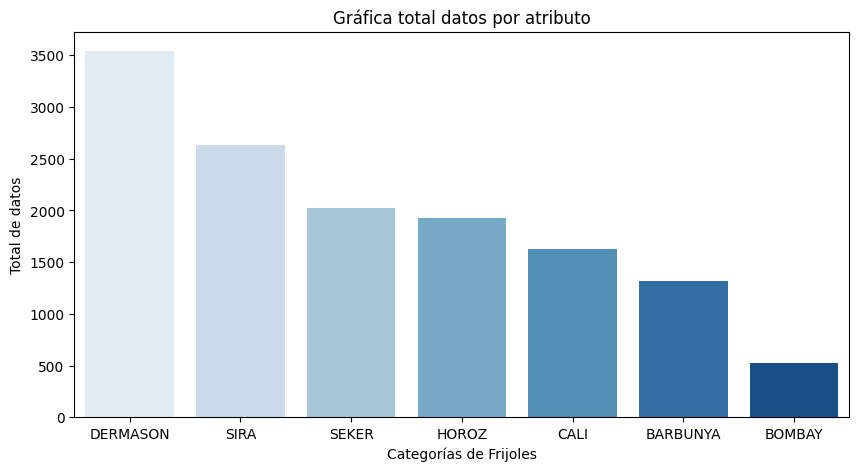

In [21]:
#Revisando los datos totales que tiene cada tipo de frijol en el atributo "class"
serie_class = ObjDataset.archivo_dataset["Class"]

#Sacandos los valores totales
print(serie_class.value_counts())
valores_series = serie_class.value_counts()

#Creando una gráfica de barras con la librería seaborn
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(x = valores_series.index, y = valores_series.values, ax = ax, palette = "Blues")
ax.set_title('Gráfica total datos por atributo')
ax.set_xlabel('Categorías de Frijoles')
ax.set_ylabel('Total de datos')
plt.show()

In [22]:
"""
Se creará una nueva variable tipo dataframe
donde la columan Class será convertida de variable categórica a numérica
"""
dataset_modificado = ObjDataset.archivo_dataset.copy()

#Modificando datos del atributo "class" del dataset
def modificando_valor(dato):
  if (dato == "DERMASON"):
    resultado = 1
  elif (dato == "SIRA"):
    resultado = 2
  elif (dato == "SEKER"):
    resultado = 3
  elif (dato == "HOROZ"):
    resultado = 4
  elif (dato == "CALI"):
    resultado = 5
  elif (dato == "BARBUNYA"):
    resultado = 6
  elif (dato == "BOMBAY"):
    resultado = 7
  return resultado

#Aplicando función para realizar el cambio al atributo o columna "Class"
dataset_modificado["Class"] = dataset_modificado["Class"].apply(modificando_valor)

#Imprimiendo el nuevo dataset
dataset_modificado.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,3
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,3
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,3
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,3
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,3
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,3


<AxesSubplot: >

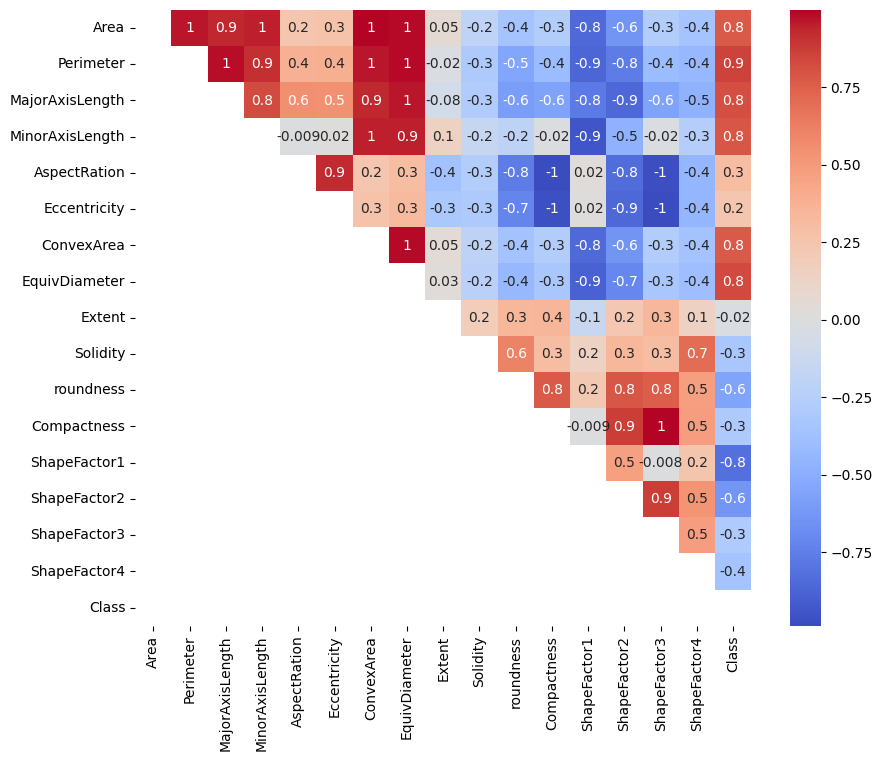

In [23]:
"""
Realizando una revisión general entre todas las variables para observar la relación que conservan.
Para ello, se aplicará un mapa de calor o matriz de correlación.
"""
Matriz_correlacion = dataset_modificado.corr()

#Creando gráfica o mapa
fig, ax = plt.subplots(figsize = (10, 8))
mascara = np.tril(Matriz_correlacion)
sns.heatmap(Matriz_correlacion, cmap = "coolwarm", annot = True, fmt = '.1g', square = True, mask = mascara)

Como se observa en el mapa de calor, existe una multicolinedad con las variables: "Area", "Perimeter", "MajorAxisLength", "AspectRation", "MinorAxisLength", "ConvexArea", "EquivDiameter", "Compactness" y "ShapeFactor3".

Por otro lado, revisando la correlación con la variable objetivo y las variables independientes: "ConvexArea", "EquivDiameter", "MinorAxisLength", "MajorAxisLength", "Perimeter" y "Area" son bastante significativas.

In [24]:
#Obteniendo la columna con los valores de correlación entre la variable objetivo y las variables predictoras
tabla_resultados = dataset_modificado.corr()["Class"]
tabla_resultados.sort_values()

ShapeFactor1      -0.817491
ShapeFactor2      -0.637430
roundness         -0.558967
ShapeFactor4      -0.356484
Solidity          -0.325609
Compactness       -0.297514
ShapeFactor3      -0.288925
Extent            -0.017542
Eccentricity       0.239292
AspectRation       0.308010
Area               0.772475
ConvexArea         0.773980
MinorAxisLength    0.784389
MajorAxisLength    0.815862
EquivDiameter      0.835496
Perimeter          0.858246
Class              1.000000
Name: Class, dtype: float64

Como se mencionó previamente, las variables predictoras: "Perimeter", "EquivDiameter", "MajorAxisLength", "MinorAxisLength", "ConvexArea" y "Area" presentan una fuerte relación con la variable objetivo "Class". 

Por otro lado, para solucionar el problema de multicolinealidad entre las variables predictoras revisadas anteriormente, se aplicará un modelo de aprendizaje llamado Random Forest, dado que este modelo conserva en su funcionamiento una opción que determina qué variables son tan importantes o que aportan un valor significativo.  

In [25]:
#Importando librerías para la solución
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [26]:
"""
Obteniendo el dataset con las variables predictoras
y otro dataset con la variable objetivo
"""
X = dataset_modificado.drop("Class", axis = 1)
y = dataset_modificado["Class"]

In [27]:
#Obteniendo el conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creando modelo de aprendizaje Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [28]:
# Entrenar el modelo de Random Forest
modelo_rf.fit(X_train, y_train)

# Obtener la importancia de las características
importancia_caracteristicas = modelo_rf.feature_importances_

In [29]:
# Crear un DataFrame para visualizar la importancia de las características
df_importancia = pd.DataFrame({'Caracteristica': X.columns, 'Importancia': importancia_caracteristicas})

# Ordenar el DataFrame por importancia descendente
df_importancia = df_importancia.sort_values('Importancia', ascending=False)

# Imprimir el DataFrame con la importancia de las características
print(df_importancia)

     Caracteristica  Importancia
1         Perimeter     0.099310
14     ShapeFactor3     0.096679
12     ShapeFactor1     0.093186
11      Compactness     0.091299
3   MinorAxisLength     0.076126
6        ConvexArea     0.072921
2   MajorAxisLength     0.071776
5      Eccentricity     0.067738
7     EquivDiameter     0.063092
4      AspectRation     0.057108
10        roundness     0.056878
0              Area     0.055858
13     ShapeFactor2     0.037280
15     ShapeFactor4     0.030858
9          Solidity     0.018602
8            Extent     0.011291


Con esta información, se puede determinar que las variables "Area" y "EquivDiameter" no tiene una gran importancia para el dataset. Por ende, se eliminarán para la solución. Además, variables predictoras como extent, solidity, shapeFactor2, shapeFactor4 y roundness no son tan relevantes.

Conviene señalar que el valor de umbral para seleccionar las variables más importantes será superior o igual a 0.7. Además de considerar los resultados observados en el mapa de calor.

## Fase 3: Preparando el conjunto de datos.

### 3.1. Eliminando atributos del dataset:

In [30]:
#Trayendo todos los atributos exceptuando algunos
dataset_nuevo = ObjDataset.archivo_dataset.copy()

dataset_nuevo = dataset_nuevo.drop(["Area", "EquivDiameter"], axis = 1)

#Imprimiendo dataset nuevo
dataset_nuevo.head(10)

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,610.291,208.178117,173.888747,1.197191,0.549812,28715,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,638.018,200.524796,182.734419,1.097356,0.411785,29172,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,624.110,212.826130,175.931143,1.209713,0.562727,29690,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,645.884,210.557999,182.516516,1.153638,0.498616,30724,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,620.134,201.847882,190.279279,1.060798,0.333680,30417,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,634.927,212.560556,181.510182,1.171067,0.520401,30600,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,670.033,211.050155,184.039050,1.146768,0.489478,30970,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,629.727,212.996755,182.737204,1.165591,0.513760,30847,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,635.681,213.534145,183.157146,1.165852,0.514081,31044,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,631.934,217.227813,180.897469,1.200834,0.553642,31120,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


### 3.2. Normalizando el dataset:

Se realiza esto para que todos los valores que tienen los atributos conserven una misma escala de trabajo.

In [31]:
#Guardando del dataset en una nueva variable
dataset_normalizado = dataset_nuevo.copy()

#Creando objeto para normalizar
scaler = MinMaxScaler()

#Separando el dataset para aplicar el proceso a las variables numéricas
#El atributo "Class" es una variable categórica
df_predictoras = dataset_normalizado.drop("Class", axis = 1)
df_objetivo = dataset_normalizado["Class"]

#Aplicando proceso de normalización
df_predictoras = pd.DataFrame(scaler.fit_transform(df_predictoras), columns = df_predictoras.columns)

dataset_normalizado = pd.concat([df_predictoras, df_objetivo], axis = 1)

#Revisando los resultados
dataset_normalizado.head(10)

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,SEKER
1,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979,SEKER
2,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,SEKER
3,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,SEKER
4,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,SEKER
5,0.075441,0.052155,0.174711,0.104024,0.435324,0.040878,0.708871,0.931491,0.906532,0.816636,0.552843,0.834819,0.784742,0.990455,SEKER
6,0.099475,0.049435,0.182200,0.086735,0.390668,0.042403,0.666131,0.859526,0.725375,0.844461,0.540441,0.863598,0.816485,0.986862,SEKER
7,0.071880,0.052940,0.178345,0.100127,0.425733,0.041896,0.692766,0.929597,0.952948,0.821696,0.547511,0.836595,0.790490,0.973331,SEKER
8,0.075957,0.053908,0.179588,0.100314,0.426197,0.042708,0.695596,0.917253,0.927264,0.822210,0.544873,0.834423,0.791075,0.985022,SEKER
9,0.073391,0.060560,0.172897,0.125204,0.483328,0.043021,0.734586,0.948725,0.959273,0.783179,0.556102,0.788141,0.747011,0.987100,SEKER


### 3.3. Datos de entrenamiento y prueba:

In [32]:
#Obteniendos conjuntos de datos de prueba y entrenamiento
X = dataset_normalizado.drop("Class", axis = 1)
y = dataset_normalizado["Class"]

#Dividiendo conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3.4. Observaciones desequilibradas:

Se busca solucionar este problema a través del uso de la técnica de sobre muestreo.

In [33]:
#Creando un objeto de la clase SMOTE
smote = SMOTE(random_state = 42)

#Aplicando proceso de sobremuestreo al conjunto de datos de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Revisando la cantidad de observaciones que tiene la variable objetivo
y_train_resampled.value_counts()

BOMBAY      2875
HOROZ       2875
DERMASON    2875
BARBUNYA    2875
CALI        2875
SEKER       2875
SIRA        2875
Name: Class, dtype: int64

## 4. Modelos de aprendizaje automático.

### 4.1. K-Nearest Neighbors:

In [34]:
"""
Aplicando módelo de aprendizaje K-Nearest Neighbors (KNN)
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
from sklearn.neighbors import KNeighborsClassifier

#Creando un objeto del modelo
knn = KNeighborsClassifier(n_neighbors = 53)

#Entrenando el modelo con los datos de entrenamiento
knn.fit(X_train_resampled, y_train_resampled)

#Realizando proceso de clasificación con el modelo entrenado
knn_predict = knn.predict(X_test)

### 4.2. Naive Bayes:

In [35]:
"""
Aplicando del módelo de aprendizaje Naive Bayes
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
from sklearn.naive_bayes import GaussianNB

"""
Se utiliza Gaussian Naïve Bayes, ya que los datos
de las variables predictorias y numéricas son continuos. Además,
conservan una distribución normal
"""

#Creando un objeto del modelo
gnb = GaussianNB()

#Entrenando el modelo con los datos de entrenamiento
gnb.fit(X_train_resampled, y_train_resampled)

#Realizando proceso de clasificación con el modelo obtenido
gnb_predict = gnb.predict(X_test)

### 4.3. Random Forest:

In [36]:
"""
Aplicando el módelo de aprendizaje Random Forest
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
from sklearn.ensemble import RandomForestClassifier

#Creando un objeto del modelo a trabajar
rfc = RandomForestClassifier(n_estimators = 100 ,random_state = 0)

#Entrenando el modelo establecido con el conjunto de datos de entrenamiento
rfc.fit(X_train_resampled, y_train_resampled)

#Realizando proceso de clasificación con el modelo entrenado
rfc_predict = rfc.predict(X_test)

### 4.4. AdaBoost:

In [37]:
"""
Aplicando el módelo de aprendizaje AdaBoost
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
from sklearn.ensemble import AdaBoostClassifier

#Creando un objeto del modelo
abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 1, random_state = 0)

#Entrenando el modelo con el conjunto de datos de entrenamiento
abc.fit(X_train_resampled, y_train_resampled)

#Realizando un proceso de clasificación con el modelo entrenado
abc_predict = abc.predict(X_test)

### 4.5. Regresión logística: 

In [38]:
"""
Aplicando el módelo de aprendizaje regresión logística
Modelo de aprendizaje supervisado
"""

"""
Se aplicará el tipo de regresión logística: Multinomial Logistic Regression.
Esto se debe porque la variable objetivo tiene más de 2 tipos de clases o categorías
"""

#Importando librería para aplicar el modelo
from sklearn.linear_model import LogisticRegression

#Creando un objeto del modelo
lg = LogisticRegression(C = 100, multi_class = "multinomial", solver = 'lbfgs', random_state = 0)

#Entrenando el modelo con el conjunto de datos de entrenamiento
lg.fit(X_train_resampled, y_train_resampled)

#Realizando un proceso de clasificación con el modelo entrenando
lg_predict = lg.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Fase 5: Evaluación modelos.

In [39]:
#Importando librerías de trabajo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 5.1. K-Nearest Neighbors:

Exactitud de (KNN) cuando (K = 53) es: 92.10429673154609%


<AxesSubplot: >

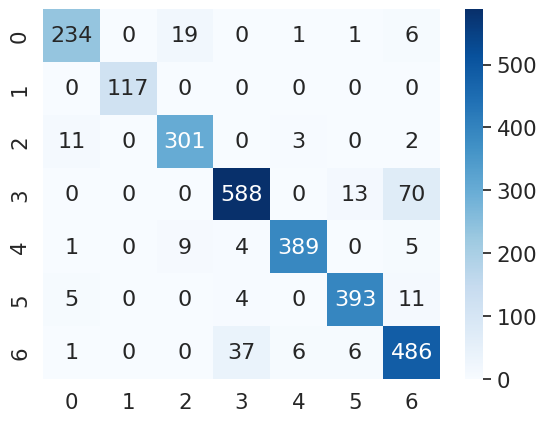

In [46]:
"""
Modelo: KNN
"""

#Revisando la exactitud de clasificación del modelo
print(f"Exactitud de (KNN) cuando (K = 53) es: {accuracy_score(y_test, knn_predict)*100}%")

#Matriz de confusión
matriz_confusion = confusion_matrix(y_test, knn_predict)

#Creando gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

### 5.1. Naive Bayes:

Exactitud de (NB) es: 90.85567388909291%


<AxesSubplot: >

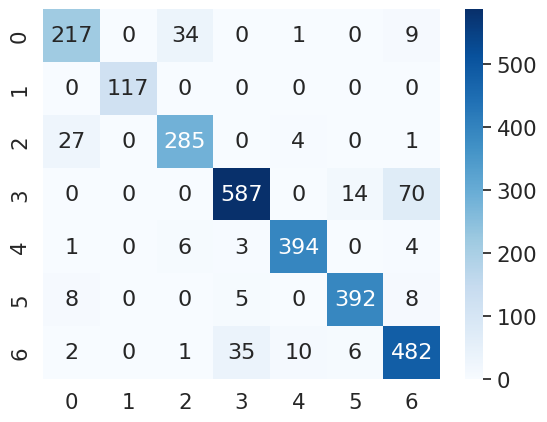

In [47]:
"""
Modelo: Naive Bayes (NB)
"""

#Revisando la exactitud del modelo
print(f"Exactitud de (NB) es: {accuracy_score(y_test, gnb_predict)*100}%")

#Obteniendo matriz de confusión
matriz_confusion_nb = confusion_matrix(y_test, gnb_predict)

#Creando gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion_nb, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

### 5.2. Random Forest:

Exactitud de (RF) es: 92.32464193903782%


<AxesSubplot: >

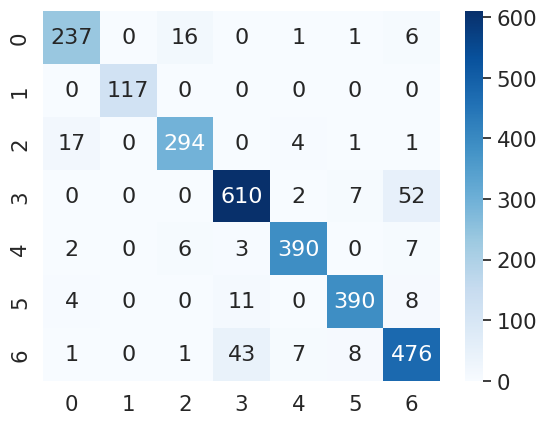

In [43]:
"""
Modelo: Random Forest (RF)
"""

#Revisando la exactitud del modelo
print(f"Exactitud de (RF) es: {accuracy_score(y_test, rfc_predict)*100}%")

#Matriz de confusión
matriz_confusion_rf = confusion_matrix(y_test, rfc_predict)

#Creando gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion_rf, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

### 5.3. AdaBoost:

Exactitud de (AB) es: 61.43958868894601%


<AxesSubplot: >

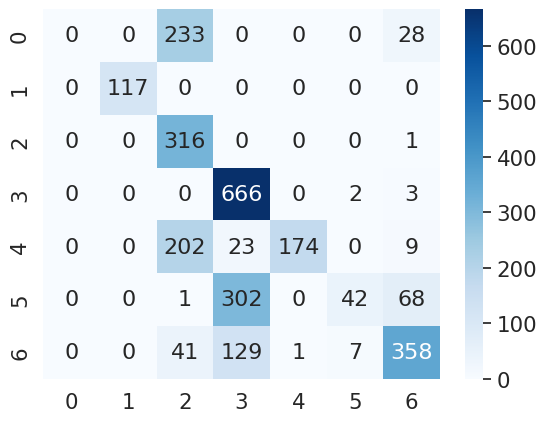

In [44]:
"""
Modelo: AdaBoost (AB)
"""

#Revisando la exactitud del modelo
print(f"Exactitud de (AB) es: {accuracy_score(y_test, abc_predict)*100}%")

#Matriz de confusión
matriz_confusion_ab = confusion_matrix(y_test, abc_predict)

#Obteniendo gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion_ab, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

### 5.4. Regresión logística:

Exactitud de (RL) es: 92.25119353654058%


<AxesSubplot: >

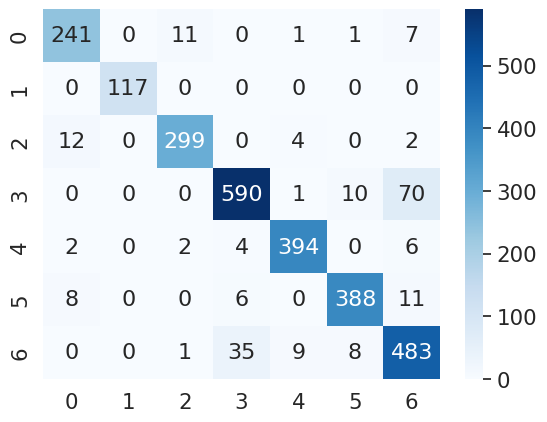

In [45]:
"""
Modelo: Regresión logística (RL)
"""

#Revisando la exactitud del modelo
print(f"Exactitud de (RL) es: {accuracy_score(y_test, lg_predict)*100}%")

#Matriz de confusión
matriz_confusion_rl = confusion_matrix(y_test, lg_predict)

#Obteniendo gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion_rl, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

## Fase 6: despliegue.

### 6.1. Selección modelo:

Como se observa en los resultados obtenidos en la fase 5 de evaluación, varios modelos de aprendizaje presentaron exactitudes con valores favorables. Sin embargo, es importante escoger el modelo que generó un óptimo proceso de clasificación a partir del conjunto de datos trabajados. Por lo tanto, el modelo Random Forest que consiguió un porcentaje del 92.34% demuestra ser el seleccionado para este caso.

### 6.2. Funcionamiento:

Con el modelo seleccionado, la siguiente etapa consiste en implementar los modelos a las maquinas automatizadas para que logren clasificar correctamente cada grano de frijol según sus características más importantes. A raíz de esto, se mejorará el rendimiento de empaquetado de cada producto de frijol para cumplir con la demanda solicitadas por el mercado colombiano. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4da20de-9373-48c0-81c4-2a925d611824' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>